<a href="https://colab.research.google.com/github/M0P5N/ColoringLeipzig/blob/DeOldify/ImageColorizerColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='blue'> Artistic Colorizer </font>**

#◢ DeOldify - Colorize your own photos!

####**Credits:**

Special thanks to:

Matt Robinson and María Benavente for pioneering the DeOldify image colab notebook.  

Dana Kelley for doing things, breaking stuff & having an opinion on everything.



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


#◢ Git clone and install DeOldify

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2512, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 2512 (delta 33), reused 149 (delta 29), pack-reused 2344
Receiving objects: 100% (2512/2512), 69.67 MiB | 23.38 MiB/s, done.
Resolving deltas: 100% (1114/1114), done.


In [2]:
cd DeOldify

/content/DeOldify


#◢ Setup

In [3]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [4]:
!pip install -r colab_requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 237 kB 7.6 MB/s 
     |████████████████████████████████| 125 kB 75.1 MB/s 
     |████████████████████████████████| 2.7 MB 74.3 MB/s 
     |████████████████████████████████| 631 kB 72.8 MB/s 
     |████████████████████████████████| 355 kB 71.8 MB/s 
     |████████████████████████████████| 112 kB 76.0 MB/s 
     |████████████████████████████████| 357 kB 77.8 MB/s 
     |████████████████████████████████| 218 kB 66.6 MB/s 
     |████████████████████████████████| 2.3 MB 52.6 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=20090d3c55fe61000e4622fbaeff6636b5126584052f4d64b2ca75f172c03c4b
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=deeedac50755d81cc51ca

In [5]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

NumExpr defaulting to 2 threads.
Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt


In [6]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2022-07-24 08:39:32--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 5.9.140.253
Connecting to data.deepai.org (data.deepai.org)|5.9.140.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  18.8MB/s    in 14s     

2022-07-24 08:39:47 (17.3 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [7]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2022-07-24 08:39:54--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2022-07-24 08:39:55 (54.0 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [8]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weigh

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

#◢ Instructions

### source_url
Type in a url to a direct link of an image.  Usually that means they'll end in .png, .jpg, etc. NOTE: If you want to use your own image, upload it first to a site like Imgur. 

### render_factor
The default value of 35 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out. 

### watermarked
Selected by default, this places a watermark icon of a palette at the bottom left corner of the image.  This is intended to be a standard way to convey to others viewing the image that it is colorized by AI. We want to help promote this as a standard, especially as the technology continues to improve and the distinction between real and fake becomes harder to discern. This palette watermark practice was initiated and lead by the company MyHeritage in the MyHeritage In Color feature (which uses a newer version of DeOldify than what you're using here).

#### How to Download a Copy
Simply right click on the displayed image and click "Save image as..."!

## Pro Tips

You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here"). 

#◢ Colorize!!

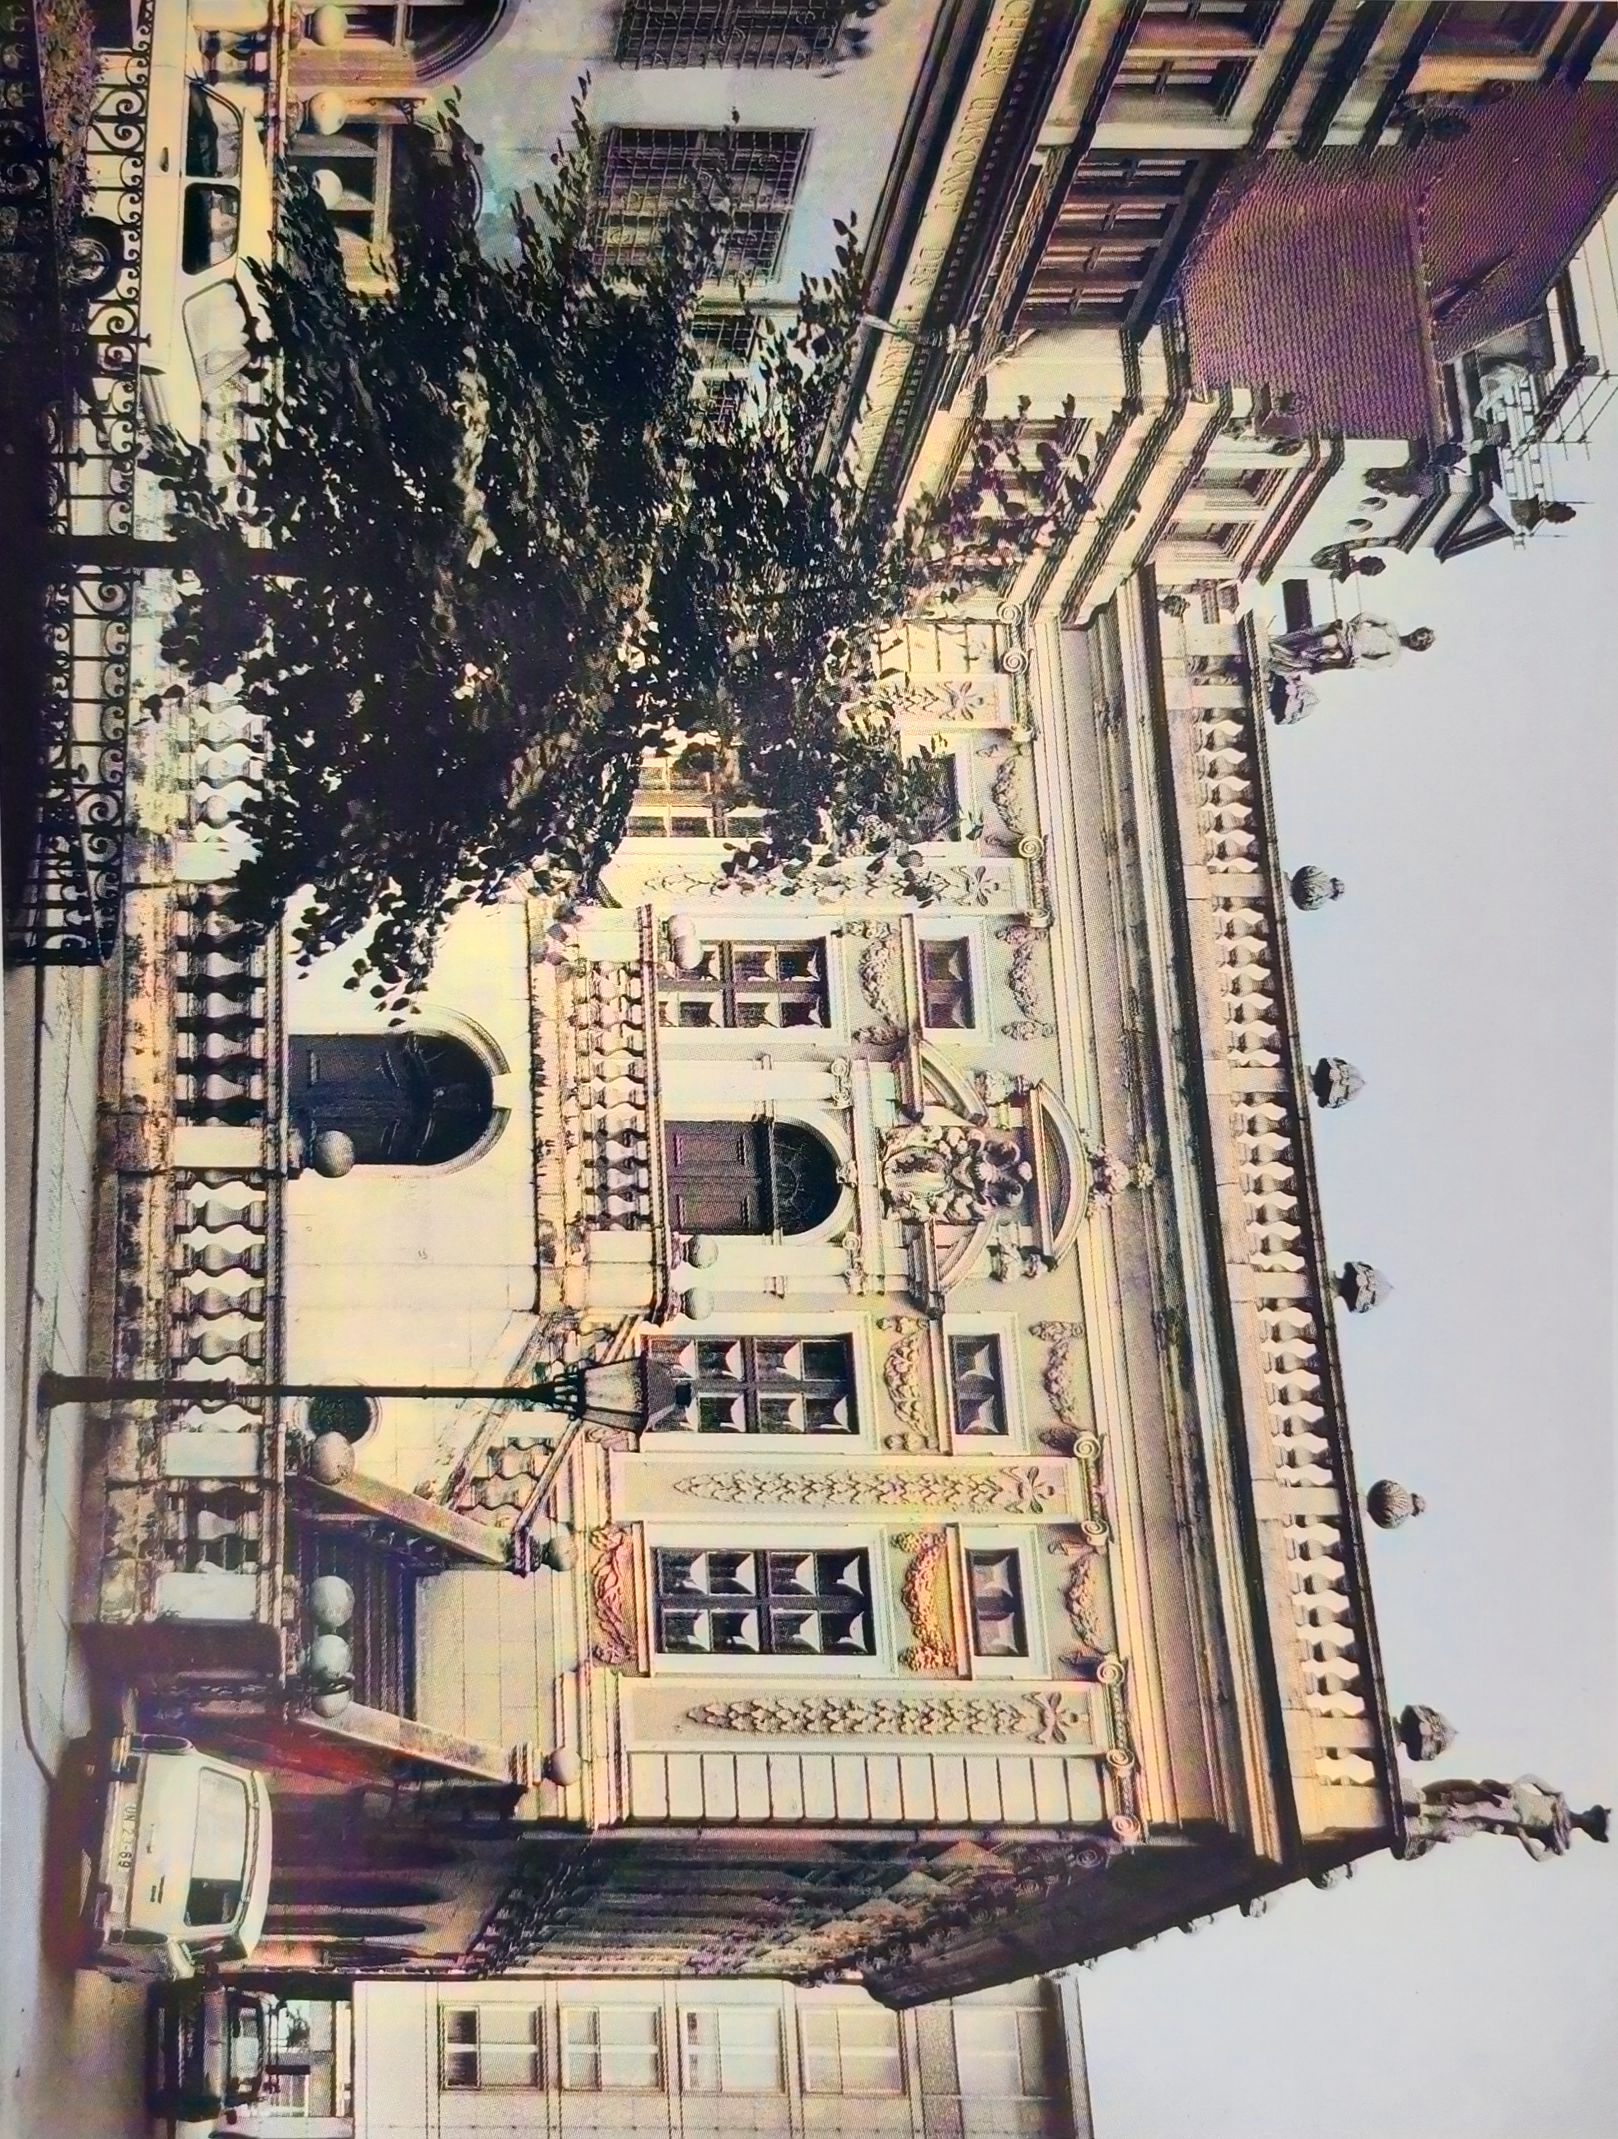

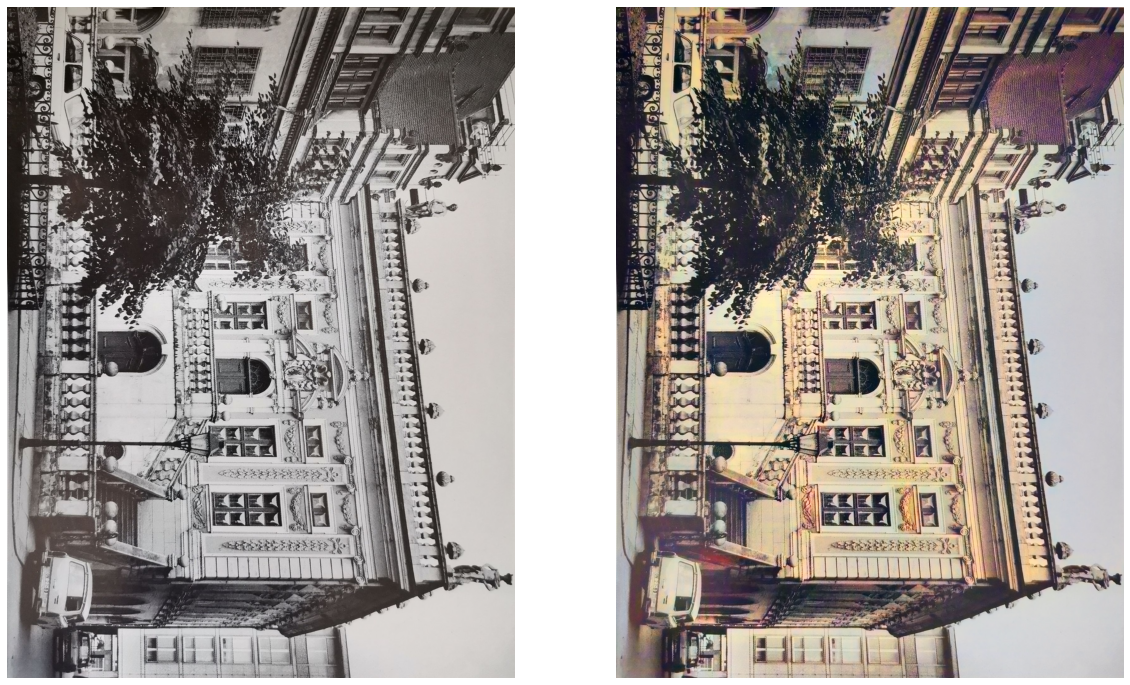

In [20]:
source_url = 'https://raw.githubusercontent.com/M0P5N/ColoringLeipzig/photos/OldLeipzig/alteBoerse1988.jpg' #@param {type:"string"}
render_factor = 13  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

## See how well render_factor values perform on the image here

In [ ]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))

---
#⚙ Recommended image sources 
* [/r/TheWayWeWere](https://www.reddit.com/r/TheWayWeWere/)